# Walmart's Weekly Sales Analysis And Prediction

In [1]:
from IPython.display import Image
import os
!ls ../input/walmart-image

walmart.jpg


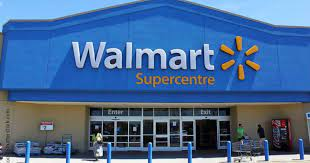

In [2]:
Image("/kaggle/input/walmart-image/walmart.jpg",width=700,height=300)

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#Introduction">Introduction</a></li>
        <li><a href="https://#Data_Wrangling">Data Wrangling</a></li>
        <li><a href="https://#Exploratory Data Analysis">Exploratory Data Analysis</a></li>
        <li><a href="https://#Model_Selection_and_Evaluation">Model Selection and Evaluation</a></li> 
        <li><a href="https://#Conclusions">Conclusions</a></li> 
        <li><a href="https://#References">References</a></li> 
    </ol>
</div>
<br>
<hr>

<h2 id="1.Introduction">1.Introduction</h2>
Sales analysis and forecasting are essential tools for businesses to understand and improve their sales performance and make informed decisions about their future sales goals (B2B International, 2018). By analyzing past sales data, businesses can identify trends and patterns that can help them understand what is driving their sales and where they may need to focus their efforts to improve (Small Business Administration, 2021). Forecasting allows businesses to project future sales based on these trends and patterns, helping them to set realistic goals and allocate resources appropriately (Business News Daily, 2021).

The importance of sales analysis and forecasting extends beyond just understanding sales performance. It is also crucial for budgeting and financial planning. By understanding their expected sales, businesses can better plan for expenses and allocate resources to meet their financial goals (Small Business Administration, 2021). Additionally, sales analysis and forecasting can help businesses identify opportunities for growth and new areas for expansion (B2B International, 2018).

In this project, we will analyze Walmart's weekly sales data across 45 different stores to gain insights into their sales performance and identify trends and patterns. We will then use this data to forecast future sales, which can assist Walmart in making informed strategic decisions. This analysis will provide Walmart with valuable information on how to optimize their sales and allocate resources effectively. Additionally, by understanding how sales vary across different stores, Walmart can identify areas for improvement and potential opportunities for growth. Overall, this project will enable Walmart to gain a deeper understanding of their sales performance and make data-driven decisions to drive future success.

<h3 id="1.1 Dataset description">1.1 Dataset description</h3>

The file **Walmart.csv** was obtained from Kaggle website. It consists of Walmart's weekly sales from 2010-02-05 to 2012-11-01. The file has the following columns:

- Store: the store number
- Date: the week of sales
- Weekly_Sales: sales for the given store
- Holiday_Flag: whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature: Temperature on the day of sale
- Fuel_Price: Cost of fuel in the region
- CPI: Prevailing consumer price index
- Unemployment: Prevailing unemployment rate in percentage
**Holiday Events include:**

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

<h3 id="1.2 Importing dependencies">1.2 Importing dependencies</h3>

In [3]:
# Importing data analysis libraries
import numpy as np
import pandas as pd

# Importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# Overriding matplotlib
sns.set()

# Import datetime
import datetime as dt


<h3 id='1.3 Loading the dataset'>1.3 Loading the datset </h3>

In [4]:
Sales=pd.read_csv('/kaggle/input/walmart-dataset/Walmart.csv')

In [5]:
Sales.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


<h2 id='2. Data WrangLing'> 2. Data WrangLing</h2>

In this section, we will identify and address any errors, inconsistencies, missing values, or duplicate entries in the dataset. This will ensure that the dataset is accurate, consistent, and complete, and will make it more suitable for analysis.

Thus we will address the following questions to ensure the quality and reliability of the dataset:

1. Are there any missing values in the dataset, and if so, what is their extent and data type?
2. Are there any duplicate entries in the dataset?
3. Are there any outliers in the dataset that may impact the analysis?
4. Does the dataset require any feature engineering to better support the analysis goals?

**1. Are there any missing values in the dataset, and if so, what is their extent and datatype?**

In [6]:
# Get the conscise summary of the dataset
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


We can see that the dataset contains 6435 rows and 8 columns. All of the columns are in the appropriate numeric data types, with the exception of the 'Date' column, which needs to be converted to a datetime type. In addition, the feature names will be converted to lowercase for consistency. This information helps us understand the structure and content of the dataset, and identify any necessary data type conversions or formatting changes.

* **Convert Date column data type to date-time**

In [7]:
# Convert date column data type to date_time
Sales['Date']=pd.to_datetime(Sales.Date)

In [8]:
# Check 
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


The **Date** has been converted to **date-time** data type.
* **Convert column names to lower case**

In [9]:
# Convert column names to lower case
Sales.columns=[col.lower() for col in Sales.columns]

In [10]:
# Check
Sales.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

All column names are now in lower case.

**2. Are there any duplicate entries in the dataset**
* **Check duplicate entries**

In [11]:
# Check duplicates
Sales[Sales.duplicated()]

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment


The dataset is free from duplicate entries.

**Import Libraries**

In [12]:
# import the preprocessing classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train/test split module
from sklearn.model_selection import train_test_split

# import the regressors
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

# import metrics
from sklearn.metrics import mean_squared_error

# import warnings
import warnings 
warnings.filterwarnings('ignore')

**3. Are ther any outliers in the dataset that many impact the analysis?**

Outliers, or data points that are significantly different from the rest of the data, can affect the accuracy and reliability of statistical measures such as the mean and standard deviation. To ensure that these measures accurately represent the data, it is necessary to identify and properly handle outliers. To address this issue, we will develop two functions: one to detect outliers and another to count them. These functions will help us identify and understand the impact of outliers on our data, and allow us to make informed decisions about how to handle them.

* **Create find_outlier_rows function**

In [13]:
def find_outlier_rows(df, col, level='both'):
    """
    Finds the rows with outliers in a given column of a dataframe.

    This function takes a dataframe and a column as input, and returns the rows
    with outliers in the given column. Outliers are identified using the
    interquartile range (IQR) formula. The optional level parameter allows the
    caller to specify the level of outliers to return, i.e., lower, upper, or both.

    Args:
        df: The input dataframe.
        col: The name of the column to search for outliers.
        level: The level of outliers to return, i.e., 'lower', 'upper', or 'both'.
               Defaults to 'both'.

    Returns:
        A dataframe containing the rows with outliers in the given column.
    """

    # compute the interquartile range(độ rải giữa)
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)

    # compute the upper and lower bounds for identifying outliers
    lower_bound = df[col].quantile(0.25) - 1.5 * iqr # Q1 của tứ phân vị
    upper_bound = df[col].quantile(0.75) + 1.5 * iqr # Q 3 của tứ phân vị

    # filter the rows based on the level of outliers to return
    if level == 'lower':
        return df[df[col] < lower_bound]
    elif level == 'upper':
        return df[df[col] > upper_bound]
    else:
        return df[(df[col] > upper_bound) | (df[col] < lower_bound)]

* **Create count_ouliers function**

In [14]:
def count_outliers(df):
    """
    This function takes in a DataFrame and returns a DataFrame containing the count and 
    percentage of outliers in each numeric column of the original DataFrame.

    Input:
        df: a Pandas DataFrame containing numeric columns

    Output:
        a Pandas DataFrame containing two columns:
        'outlier_counts': the number of outliers in each numeric column
        'outlier_percent': the percentage of outliers in each numeric column
    """
    # Select numeric columns
    df_numeric=df.select_dtypes(include=['int','float'])
    
    # Get column names
    columns=df_numeric.columns
    
    # Find the name of all columns with outliers
    outlier_cols=[col for col in columns if len(find_outlier_rows(df_numeric,col)) !=0]
    
    # Dataframe to store the results
    outliers_df=pd.DataFrame(columns=['outlier_counts','outlier_percent'])
    
    # Count the outliers and compute the percentages of outliers for each column
    for col in outlier_cols:
        outlier_count=len(find_outlier_rows(df_numeric,col))
        all_entries=len(df[col])
        outlier_percent=round(outlier_count*100/all_entries,2)
        
        # Store the results in the DataFrame
        outliers_df.loc[col]=[outlier_count,outlier_percent]
    # Return the resulting dataframe
    return outliers_df
        

* **Count the outliers in the columns of the sales dataframe**

In [15]:
# Count the outliers in sales dataframe
count_outliers(Sales).sort_values('outlier_counts',ascending=False)

,outlier_counts,outlier_percent
unemployment,481.0,7.47
holiday_flag,450.0,6.99
weekly_sales,34.0,0.53
temperature,3.0,0.05


 The above dataframe shows that **weekly_sales,holiday_flag, temperature and unemployment columns all have outliers with unemployment** having the largest outliers percentage, 7 % . Let's examine the outliers in each column to decide on how to handle them.

Examine the **Unemployment** outliers.

In [16]:
# View the summary statistic of unemployment rate
find_outlier_rows(Sales,'unemployment')['unemployment'].describe()

count    481.000000
mean      11.447480
std        3.891387
min        3.879000
25%       11.627000
50%       13.503000
75%       14.021000
max       14.313000
Name: unemployment, dtype: float64

The minimum and maximum values of these outliers are 3.89% and 14.31% respectively. Majority, greater or equal to 75%, are more than or equal to 11.6%. These values are obtainable in reality and will be left intact for the analysis. Thus, median, which rubust to outliers, will be used to measure the centre of the unemployment rate distribution.
- Examine the **holiday_flag**

In [17]:
find_outlier_rows(Sales,"holiday_flag")['holiday_flag'].describe()

count    450.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: holiday_flag, dtype: float64

We can see that all special holiday weeks form the outliers. This is as result of the fact that most of the weeks, 93%, are non-special holiday weeks. This sill also be left intact.

Examine **weekly_sales** outliers.

In [18]:
# Find the outliers in weekly sales
find_outlier_rows(Sales,'weekly_sales').head(5)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163
241,2,2011-12-23,3224369.80,0,46.66,3.112,218.999550,7.441
471,4,2010-11-26,2789469.45,1,48.08,2.752,126.669267,7.127
474,4,2010-12-17,2740057.14,0,46.57,2.884,126.879484,7.127
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127


We can note that all the weekly_sales outliers occur either November or December with with one outlier of the outliers that occur in October.

**4. Does the datset require any feature engineering to better support the analysis goals**

Employment rate may be correlated with weekly sales. This will be created from the **Unemployment rate**. Also the date column will be split into three so that we can analyse the data by year, month or day.

In [19]:
# Calculte the employment rate
Sales['employment']=100-Sales['unemployment']

# Split the date columns
Sales['year']=Sales['date'].dt.year
Sales['month']=Sales['date'].dt.month
Sales['dat']=Sales['date'].dt.day
Sales.head(5)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,employment,year,month,dat
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,91.894,2010,2,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,91.894,2010,5,3


<h2 id="3. Exploratory Data Analysis"> 3. Exploratory Data Analysis</h2>

This section explores the dataset in order to extract useful information

In [20]:
# Get the summary statistic of the dataset
Sales.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
weekly_sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
holiday_flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
fuel_price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
cpi,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01
employment,6435.0,9.200085e+01,1.875885,85.687,91.378,92.126000,9.310900e+01,9.612100e+01
year,6435.0,2.010965e+03,0.797019,2010.000,2010.000,2011.000000,2.012000e+03,2.012000e+03
month,6435.0,6.475524e+00,3.321797,1.000,4.000,6.000000,9.000000e+00,1.200000e+01


**2. What is the disribution of the features of the dataset?**

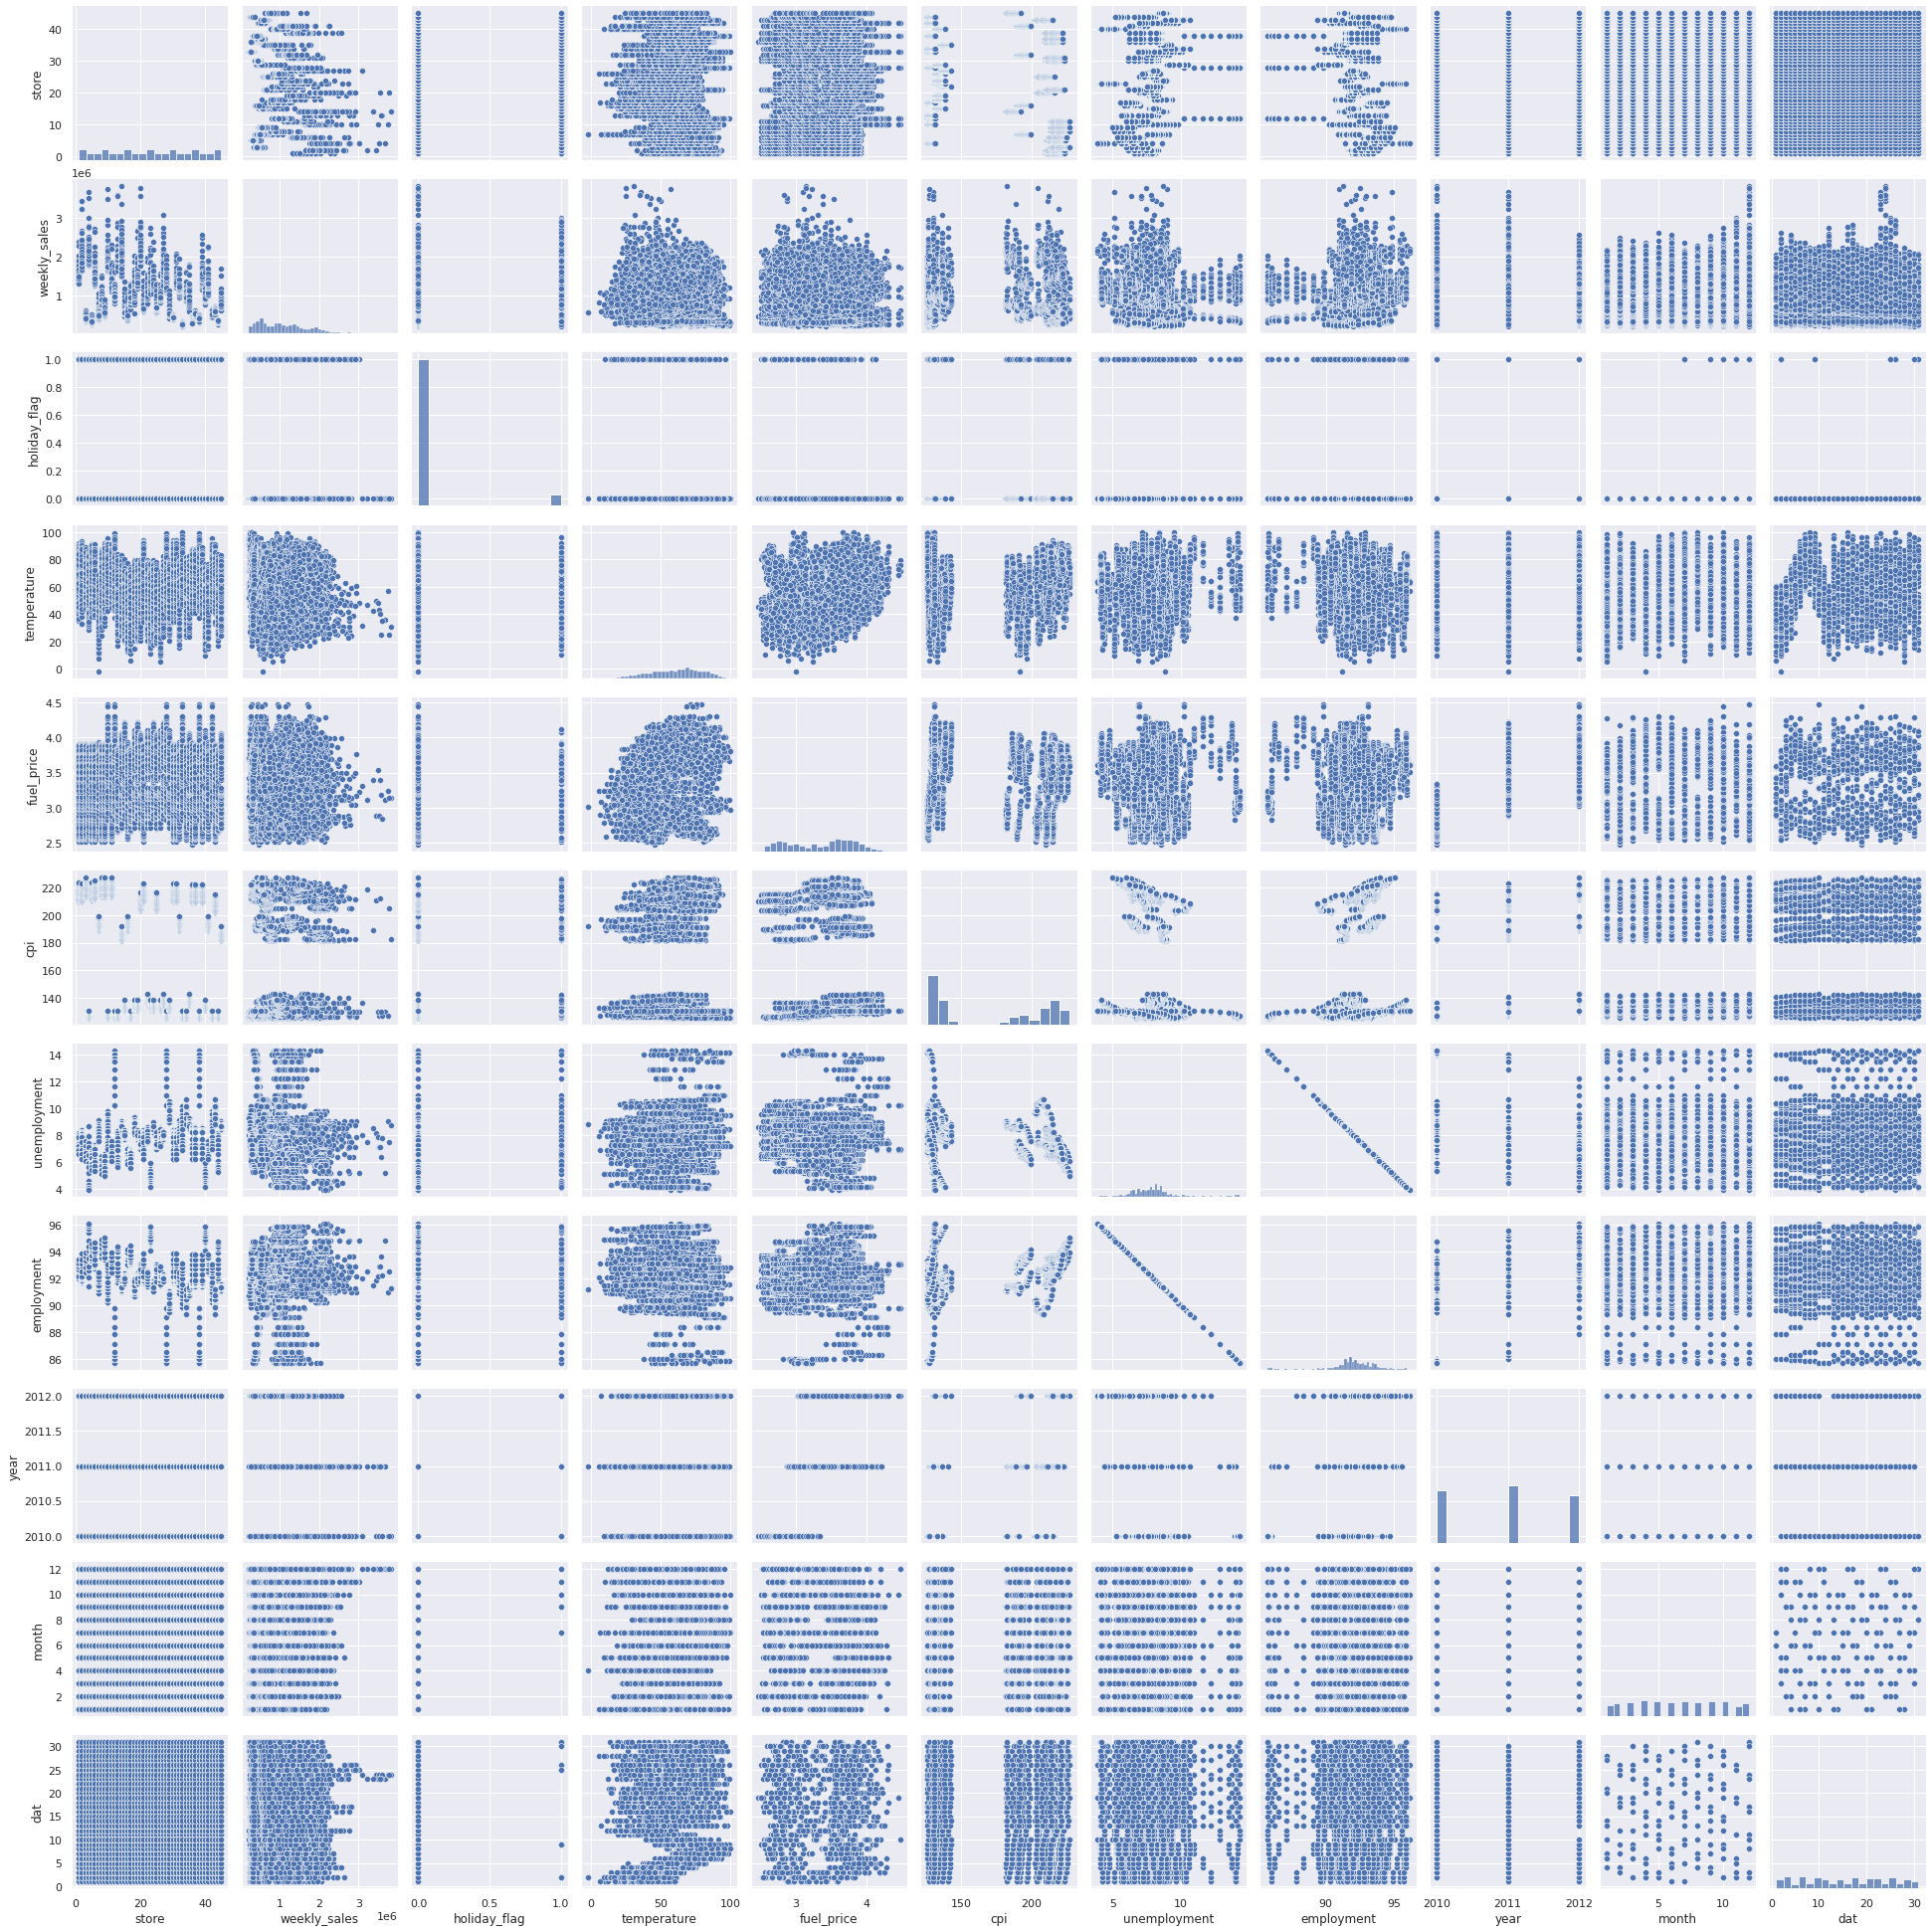

In [21]:
# Pairplot 
sns.pairplot(Sales)

array([[<AxesSubplot:title={'center':'store'}>,
        <AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'weekly_sales'}>],
       [<AxesSubplot:title={'center':'holiday_flag'}>,
        <AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'fuel_price'}>],
       [<AxesSubplot:title={'center':'cpi'}>,
        <AxesSubplot:title={'center':'unemployment'}>,
        <AxesSubplot:title={'center':'employment'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'dat'}>]], dtype=object)

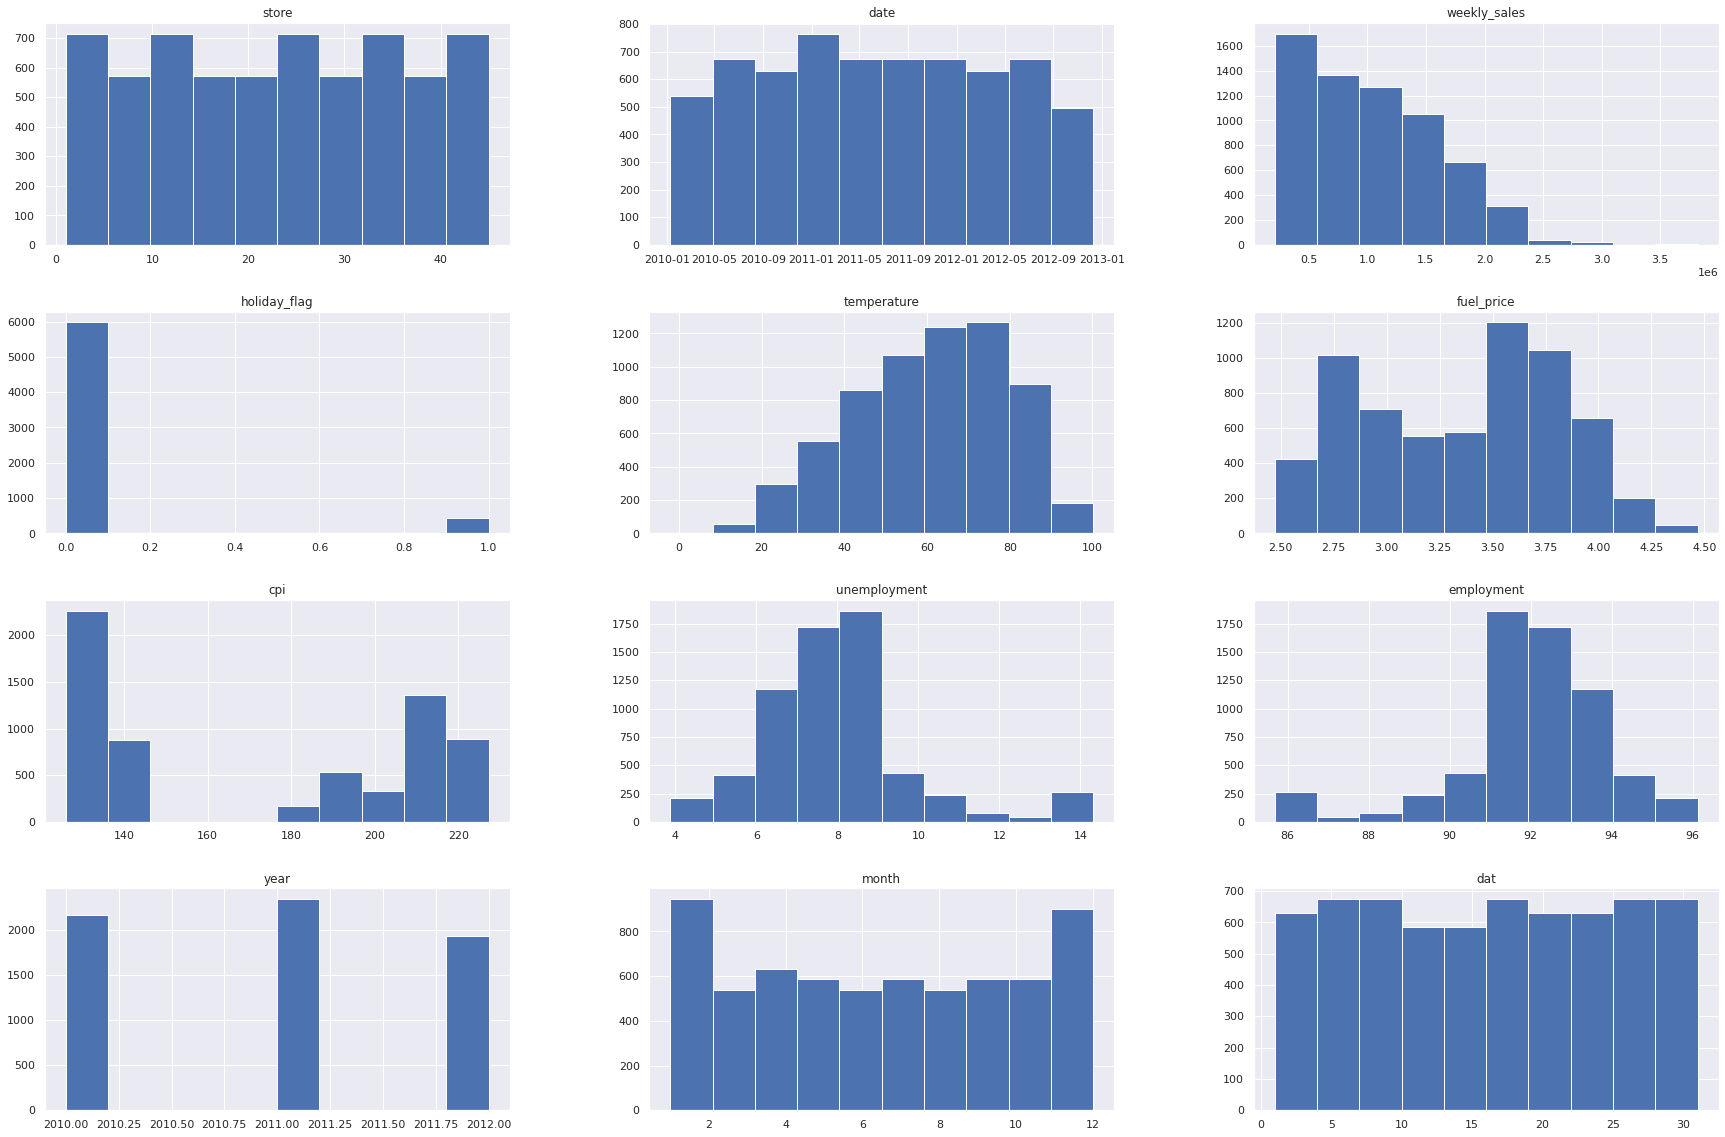

In [22]:
# Histograms
Sales.hist(figsize=(30,20))

From the above histograms, we can understand that:
- The number of transaction occurred almost evenly across various and years.
- The distribution of **weekly_sale** right-skewed. Only a few of the weekly sales are above 2 milion USD.
- The distribution of **fuel_price** is bi_modal.
- CPI formed two cluster.
- **Unemployee** rate is near normally distributed.
- Four consecutive months November-Febrruary recorded the highest sales.

**3. What is the overall trend in sales over time?**

Sales trend analysis inolves examining the historycal sales data of a bussiness or product over time to understand paaterns, trends, and changes insakes performance. It is an important tool for bussiness to identify opportunities for growth, understand their customer's behaviour, optimise resources, and make informed decidions about future sales.

We will aggregate the everage weekly sales months sales by month for the three year and visualize the trend using a line plot.

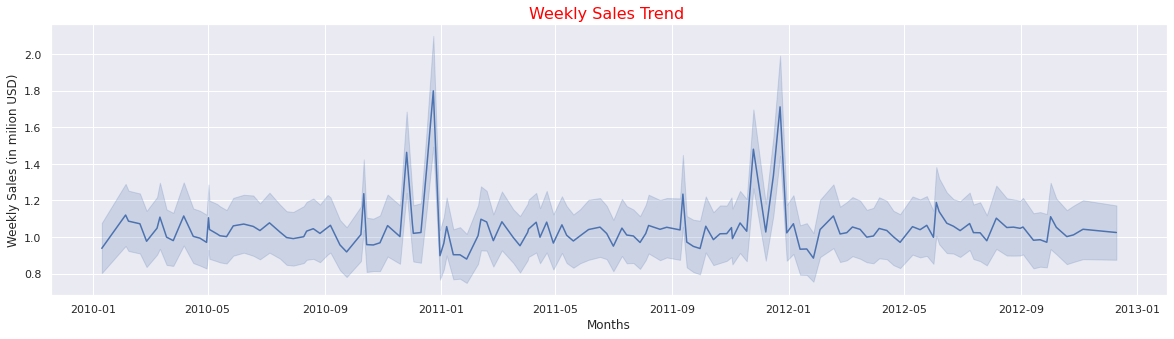

In [23]:
# Plot the line chart of the weekly_sale
fig,ax=plt.subplots(figsize=(20,5))
sns.lineplot(x=Sales.date,y=(Sales.weekly_sales/1e6))
plt.xlabel("Months")
plt.ylabel("Weekly Sales (in milion USD)")
plt.title('Weekly Sales Trend ', fontdict={'fontsize':16,'color':'red'},pad=5)
annot=ax.annotate(' ',xy=(0,0),xytext=(20,20),textcoords='off set points',
                  bbox=dict(boxstyle="round",fc='w'),
                  arrowprops=dict(arrowstyle='->'))

annot.set_visible(False)
plt.show()

The line plot reveals that weekly sales at generally remain stable thoughout the year, with the exception of the November and December, which experience a signofocant increase in sales.This trend is likely due to the holiday season, when consumers typically make more purchase and retailers offer promotions and discounts. Topcapitalize on this behavior, Walmart could consider  offering seasonal discuonts and promotions, as well as ensuring a seamless and enjoyable shooping experience through their moblie and wed outliers during festive periods. By doing so, they can encourage more customers to make purchase and potentially drive up sales.

**4 Are there any seasonality trends in the datset**

Seasonality trends analysis can be extremely valuable for businesses, as it allows us to better forecast future sales, make more informed decisions about inventory and staffing, and understand the drivers of customer demand leading to improved efficiency and profitability.

We will create a pivot table to group the data by month and year and calculate the average sales for each period. We will then plot the average sales of the table using line chart for the three years. This will allow us to see if there are any patterns in the data that repeat at regular intervals.

In [24]:
# Create the piviot table
pivot_table=Sales.pivot_table(index='month',columns='year',values='weekly_sales')
# Display the pivot table
pivot_table.head(5)

year,2010,2011,2012
month,,,
1,9.386639e+05,9.420697e+05,9.567817e+05
2,1.064372e+06,1.042273e+06,1.057997e+06
3,1.034590e+06,1.011263e+06,1.025510e+06
4,1.021177e+06,1.033220e+06,1.014127e+06
5,1.039303e+06,1.015565e+06,1.053948e+06


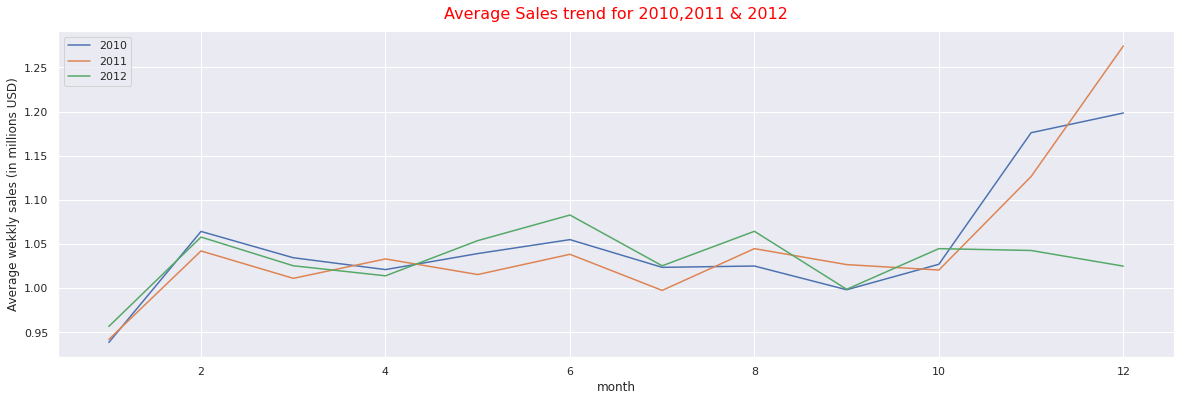

In [25]:
# Plot the everage sales
fix,ax=plt.subplots(figsize=(20,6))
sns.set_palette("bright")
sns.lineplot(x=pivot_table.index,y=pivot_table[2010]/1e6,ax=ax,label="2010")
sns.lineplot(x=pivot_table.index,y=pivot_table[2011]/1e6,ax=ax,label="2011")
sns.lineplot(x=pivot_table.index,y=pivot_table[2012]/1e6,ax=ax,label="2012")

plt.ylabel("Average wekkly sales (in millions USD)")
plt.title("Average Sales trend for 2010,2011 & 2012",fontdict={"fontsize":16,"color":"red",
          "horizontalalignment":"center"},pad=12)

# Add a legend
plt.legend()
plt.show()

We can observe that the line charts for the three years for the month of January to October simultaneously follow a sawtooth shape with big rises experienced in November and December due to holidays. This indicates seasonality trends as months do have consistencies in bigger or smaller sales for the three years. We can also observe that although 2011 performed worst than 2010 in terms of average sales for Walmart, the trend was reversed for the year 2012 which performed better than 2010. However, the data for 2012 ends in October, which may explain the significant drop in sales for November."

**5. Which stores had the highest and lowest average revenues over the years?**

We can observe that the line charts for the three years for the month of January to October simultaneously follow a sawtooth shape with big rises experienced in November and December due to holidays. This indicates seasonality trends as months do have consistencies in bigger or smaller sales for the three years. We can also observe that although 2011 performed worst than 2010 in terms of average sales for Walmart, the trend was reversed for the year 2012 which performed better than 2010. However, the data for 2012 ends in October, which may explain the significant drop in sales for November."

In [26]:
def plot_top_and_bottom_stores(df,col):
    """
    Plot the top and bottom 5 stores based on their average weekly sales.
    
    Parameters:
    df (pandas DataFrame): The dataframe containing the sales data.
    col (str): The name of the column to group the data by.
    
    Returns:
    None
    """
    # Gruop the data bu the dpecified column and sort in by sales
    # In descending order
    df=df.groupby(col).mean().sort_values(by='weekly_sales',ascending=False)
    # Select the top5, bottom 5 products
    top_stores=df.head(5)
    bottom_stores=df.tail(5)
    
    # Set the color palette
    sns.set_palette("bright")
    
    # Create a bar chart of the top products
    fig,ax=plt.subplots(figsize=(10,6))
    sns.barplot(x=top_stores.index,y=top_stores['weekly_sales']/1e6,order=top_stores.index)
    plt.title('Top 5 Stores By Average Sales')
    plt.ylabel("Average weekly sales (milions USD)")
    plt.show()
    
    # Create a bar chart of the bottom 5 products
    fig,ax=plt.subplots(figsize=(10,6))
    sns.barplot(x=bottom_stores.index,y=bottom_stores['weekly_sales']/1e6,order=bottom_stores.index)
    plt.title("Bottom 5 stores Vy Average Sales")
    plt.ylabel("Average Weekly Sales (millions USD)")
    plt.show()

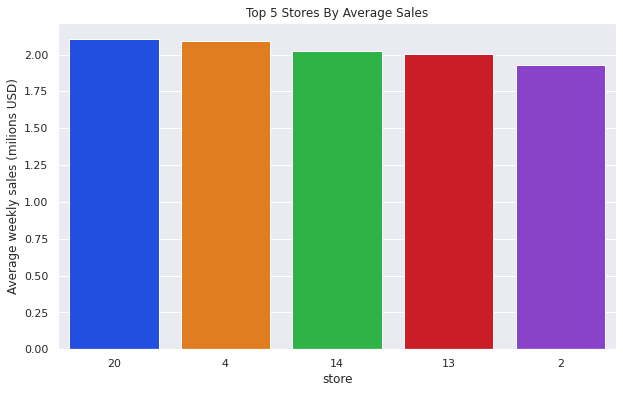

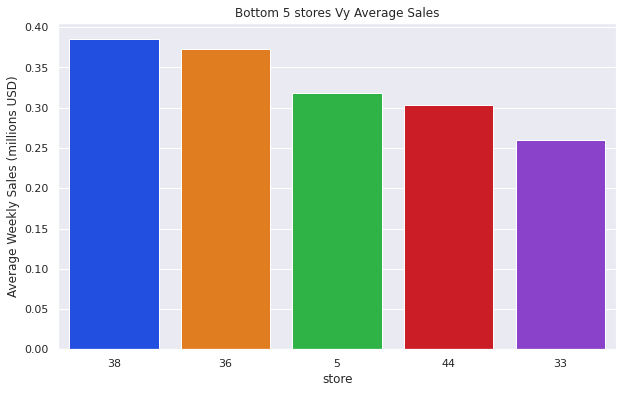

In [27]:
plot_top_and_bottom_stores(Sales,'store')

The graphs show that the top performing stores have relatively stable sales with an average of around $2 million USD. Store 20 appears to be the top performer among these stores, with relatively little variation in sales compared to the other top performers.

On the other hand, the lowest performing stores have higher variations in sales, with the highest sales at around $0.38 million USD. This suggests that there may be more variability in the sales performance of these stores.

**5.How does non_holiday weekly sales compared to holiday weekly sales?**

In [28]:
# Filter out non_holiday weekly sales
non_holiday_sales=Sales[Sales['holiday_flag']==0]
holiday_sales=Sales[Sales['holiday_flag']==1]


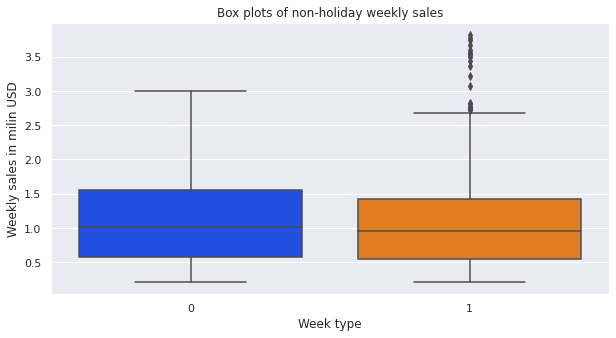

In [29]:
# Plot boxplots of non_holiday and holiday weekly sales
fig,ax=plt.subplots(figsize=(10,5))
sns.boxplot(data=[holiday_sales['weekly_sales']/1e6,non_holiday_sales['weekly_sales']/1e6])

plt.ylabel("Weekly sales in milin USD")
plt.xlabel("Week type")
plt.title("Box plots of non-holiday weekly sales")
plt.show()

- We can see that both holiday and non-holiday weekly sales have similar spread. However, the bigger sales haapen during the holiday weeks. 

Text(0.5, 1.0, 'Correlation Heatmap')

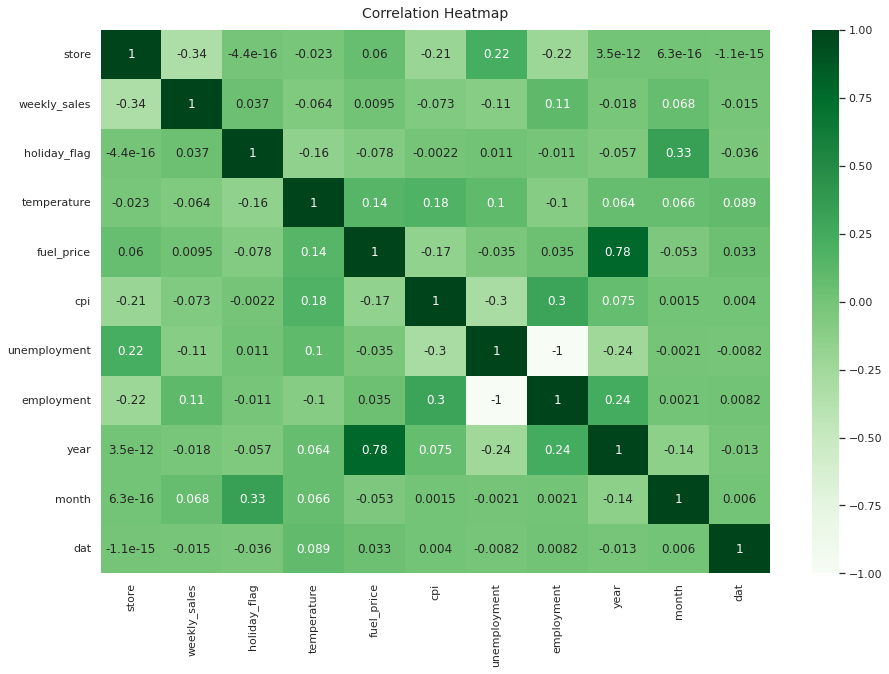

In [30]:
fig,ax=plt.subplots(figsize=(15,10))
heatmap=sns.heatmap(Sales.corr(),vmin=-1,vmax=1,annot=True,cmap='Greens')
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':14},pad=12)

<h2 id="4. Model Selection and Evaluation">4. Model Selection and Evaluation</h2>

In this section, we will evaluate the performance of several different regressors on our data. We will use root mean squared error (RMSE) as our evaluation metric. RMSE is a measure of the difference between the predicted values and the true values. It is calculated as the square root of the mean squared error (MSE), where MSE is the average of the squared differences between the predicted and true values. Lower values of RMSE indicate better performance.

We will fit and evaluate the following regressors:

- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Support Vector Regressor, etc.

We will fit each of these regressors to our training data and make predictions on the test set. Then, we will calculate the RMSE of the predictions and compare the results to choose the best regressor.

To ensure that the original dataset is not modified during the modeling process and to facilitate debugging if needed, we will create a copy of the preprocessed dataset before fitting our various models. This will help to preserve the integrity of the original data and allow us to refer to it if any issues arise during the modeling process.

In [31]:
# Make a copy of the datset
Sales_copy=Sales.copy()

In [32]:
# Drop the date and unemployment columns
Sales_copy.drop(['date','unemployment'],axis=1,inplace=True)
# Check
Sales_copy.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,employment,year,month,dat
0,1,1643690.90,0,42.31,2.572,211.096358,91.894,2010,5,2
1,1,1641957.44,1,38.51,2.548,211.242170,91.894,2010,12,2
2,1,1611968.17,0,39.93,2.514,211.289143,91.894,2010,2,19
3,1,1409727.59,0,46.63,2.561,211.319643,91.894,2010,2,26
4,1,1554806.68,0,46.50,2.625,211.350143,91.894,2010,5,3


In [33]:
X=Sales_copy.drop('weekly_sales',axis=1)
y=Sales_copy['weekly_sales']

**Scaling the feature**

Scaling is a preprocessing step that transforms the features of a dataset so that they have a similar scale and can improve the performance of some regression algorithms and facilitate comparison of the model's coefficients. In this project we will use standard scaler to standardize the features of the dataset.

In [34]:
# scale the features
scaler= StandardScaler()
X_scaled=scaler.fit_transform(X)

**Splitting the dataset**

To properly evaluate the performance of our dataset and prevent overfitting, we can use cross-validation techniques. One such technique is to split the dataset into a training set and a testing set. The training set is used to train the model, while the testing set is used to evaluate the model's performance. This can help us determine how well the model generalizes to unseen data and can identify any issues with overfitting. It is important to randomly shuffle the data before splitting it into the train and test sets, as this can help ensure that the data is representative of the overall population and not biased in any way.

In [35]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

**Model training and evaluation**

In this subsection, we will create a function that will train multiple regressors and compare their performance using the root mean square error (RMSE) metric. We will use the RMSE values to compare the performance of the various regressors and determine which model has the lowest error and is therefore the best fit for our data.

In [36]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate a model on training and test data.

    Parameters
    ----------
    model : object
        A scikit-learn estimator object.
    X_train : array-like or pd.DataFrame
        Training data with shape (n_samples, n_features).
    y_train : array-like
        Training labels with shape (n_samples,).
    X_test : array-like or pd.DataFrame
        Test data with shape (n_samples, n_features).
    y_test : array-like
        Test labels with shape (n_samples,).

    Returns
    -------
    rmse : float
        Root mean squared error between the test labels and the predictions.
    """
    # train
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    # calculate RMSE
    rmse = np.sqrt(mse)
    return rmse

In [37]:
def evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test):
    """
    This function takes a list of regressors, their names, and the training and test data as input
    and returns a dataframe with the names of the regressors and their root mean squared error (RMSE)
    on the test data.
    
    Parameters:
    -----------
    regressors (list): a list of scikit-learn compatible regression models
    regressor_names (list): a list of strings containing the names of the regression models
    X_train (pandas DataFrame): a pandas DataFrame containing the features for training the models
    y_train (pandas Series): a pandas Series containing the target values for training the models
    X_test (pandas DataFrame): a pandas DataFrame containing the features for testing the models
    y_test (pandas Series): a pandas Series containing the target values for testing the models
    
    Returns:
    --------
    pandas DataFrame: a dataframe containing the names of the regressors and their corresponding RMSE on the test data
    """
    
    # evaluate the models and compute their RMSE on the test data
    rmses = [evaluate_model(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]
    
    # create a dictionary mapping the names of the regressors to their RMSE
    regressor_rmses = dict(zip(regressor_names, rmses))
    
    # convert the dictionary to a pandas dataframe
    df = pd.DataFrame.from_dict(regressor_rmses, orient='index')
    
    # reset the index of the dataframe
    df = df.reset_index()
    
    # rename the columns of the dataframe
    df.columns = ['regressor_name', 'rmse']
    
    # sort the dataframe by RMSE in ascending order
    return df.sort_values('rmse', ignore_index=True)

In [38]:
# initialize the regressors
linear_regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([("polynomial_features", polynomial_features),
("linear_regression", linear_regressor)])
ridge_regressor = Ridge()
lasso_regressor = Lasso()
elastic_net_regressor = ElasticNet()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
boosted_tree_regressor = GradientBoostingRegressor()
neural_network_regressor = MLPRegressor()
support_vector_regressor = SVR()
grad_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='ls')
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
spline_regressor = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [39]:
# collect the list of regressors
regressors = [linear_regressor, polynomial_regressor, ridge_regressor, lasso_regressor, elastic_net_regressor, 
              decision_tree_regressor, random_forest_regressor, boosted_tree_regressor, neural_network_regressor, 
              support_vector_regressor, knn_regressor, spline_regressor]

# collect the names of regressors
regressor_names = ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression", 
                   "Elastic Net Regression", "Decision Tree Regression", "Random Forest Regression", 
                   "Boosted Tree Regression", "Neural Network Regression", "Support Vector Regression", 
                   "K-Nearest Neighbour Regression", "Spline Regression"]

In [40]:
print('\033[1m Table of regressors and their RMSEs')
evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

 Table of regressors and their RMSEs


,regressor_name,rmse
0,Random Forest Regression,1.143199e+05
1,Decision Tree Regression,1.490531e+05
2,Boosted Tree Regression,1.750082e+05
3,Spline Regression,4.377083e+05
4,K-Nearest Neighbour Regression,4.606521e+05
5,Polynomial Regression,4.786478e+05
6,Ridge Regression,5.209623e+05
7,Lasso Regression,5.209627e+05
8,Linear Regression,5.209628e+05
9,Elastic Net Regression,5.258987e+05


**Result interpretation**

Let's interprete the result by evaluating the rmse value of the best model, the Random Forest Regressor.

In [41]:
# evaluate rmse for the regressors
rmse = evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

In [42]:
# pick the best rmse
best_rmse = rmse.iloc[0]['rmse']
# compute the median of the weekly sales 
median_Sale = Sales['weekly_sales'].median()
# compute percentage error
percent_deviation = round((best_rmse*100/median_Sale), 2)
# print the result
print('The model has average percentage error of {}%'.format(percent_deviation))

The model has average percentage error of 11.86%


The above table shows that Random Forest Regressor outperformed all the regressors with RMSE of 1.15e+05. This provide a good estimate for future sales as it has about 12% average error compared to the typical median sale.

Above array is how tree number 0 voted on the first 10 samples. Pretty cool, right? Back to random forest, let’s see what the model thinks, which features are the most important for customer engagement.

<h2 id="5. Conclusions">5. Conclusions</h2>

Our analysis shows that sales during holiday weeks are significantly higher than during non-holiday weeks, with sales doubling on average. Additionally, there is a strong seasonal component to the sales data. The average sales of the top performing stores are up to 500% higher than the lowest performing stores.

The best model for predicting future sales is the Random Forest Regressor model,which achieved an RMSE of 1.15 e+05. This is a good estimate as it is 88,5% close to the median sale of the data.

These findings have important implications for businesses as they can inform decisions about inventory, staffing, and marketing efforts. By understanding the factors that drive sales and using a reliable model to forecast future sales, businesses can better plan for the future and optimize their resources.

**Future work**

- One area that future studies could explore is the relationship between festive sales and profit margins. By augmenting the dataset with expenses data, it would be possible to investigate whether larger festive sales always translate to larger profit margins. This can inform decisions about marketing and pricing strategies.

- The analysis showed a 500% difference in sales between the top performing and lowest performing stores, which is a significant difference. This suggests that there may be underlying factors contributing to the performance of these stores. To better understand the reasons behind the performance of these stores, it is necessary to gather additional data and parameters that may be influencing the sales of the top selling products. -Hyperparameter tuning involves adjusting the parameters of a model in order to improve its performance on a given dataset. By iteratively adjusting the parameters of the best model, it is possible to achieve an even better model.

<h2 id="6. References">6. References</h2>

- Kaggle
- B2B International (2018). Sales Forecasting: The Importance and Benefits.
- Business News Daily (2021). Sales Forecasting: The Importance of Accurate Sales Forecasts.
- Small Business Administration (2021). The Importance of Sales Forecasting.